In [1]:
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np
from random import randint
import argparse
from matplotlib.image import imread

# for Angle calculation
import math
# for Executed Time calculation
import time

import winsound as ws

In [2]:
BODY_PARTS_MPI = {0: "Head", 1: "Neck", 2: "RShoulder", 3: "RElbow", 4: "RWrist",
                  5: "LShoulder", 6: "LElbow", 7: "LWrist", 8: "RHip", 9: "RKnee",
                  10: "RAnkle", 11: "LHip", 12: "LKnee", 13: "LAnkle", 14: "Chest",
                  15: "Background"}

POSE_PAIRS_MPI = [[0, 1], [1, 2], [1, 5], [1, 14], [2, 3], [3, 4], [5, 6],
                  [6, 7], [8, 9], [9, 10], [11, 12], [12, 13], [14, 8], [14, 11]]

BODY_PARTS_COCO = {0: "Nose", 1: "Neck", 2: "RShoulder", 3: "RElbow", 4: "RWrist",
                   5: "LShoulder", 6: "LElbow", 7: "LWrist", 8: "RHip", 9: "RKnee",
                   10: "RAnkle", 11: "LHip", 12: "LKnee", 13: "LAnkle", 14: "REye",
                   15: "LEye", 16: "REar", 17: "LEar", 18: "Background"}

POSE_PAIRS_COCO = [[0, 1], [0, 14], [0, 15], [1, 2], [1, 5], [1, 8], [1, 11], [2, 3], [3, 4],
                   [5, 6], [6, 7], [8, 9], [9, 10], [12, 13], [11, 12], [14, 16], [15, 17]]

BODY_PARTS_BODY_25 = {0: "Nose", 1: "Neck", 2: "RShoulder", 3: "RElbow", 4: "RWrist",
                      5: "LShoulder", 6: "LElbow", 7: "LWrist", 8: "MidHip", 9: "RHip",
                      10: "RKnee", 11: "RAnkle", 12: "LHip", 13: "LKnee", 14: "LAnkle",
                      15: "REye", 16: "LEye", 17: "REar", 18: "LEar", 19: "LBigToe",
                      20: "LSmallToe", 21: "LHeel", 22: "RBigToe", 23: "RSmallToe", 24: "RHeel", 25: "Background"}

POSE_PAIRS_BODY_25 = [[0, 1], [0, 15], [0, 16], [1, 2], [1, 5], [1, 8], [8, 9], [8, 12], [9, 10], [12, 13], [2, 3],
                      [3, 4], [5, 6], [6, 7], [10, 11], [13, 14], [15, 17], [16, 18], [14, 21], [19, 21], [20, 21],
                      [11, 24], [22, 24], [23, 24]]

#protoFile = "C:\\softtermp\\openpose-master\\openpose-master\\models\\pose\\mpi\\pose_deploy_linevec_faster_4_stages.prototxt"

# 신경 네트워크의 구조를 지정하는 prototxt 파일 (다양한 계층이 배열되는 방법 등)
protoFile_mpi = "C:\\softtermp\\openpose-master\\openpose-master\\models\\pose\\mpi\\pose_deploy_linevec.prototxt"
protoFile_mpi_faster = "C:\\softtermp\\openpose-master\\openpose-master\\models\\pose\\mpi\\pose_deploy_linevec_faster_4_stages.prototxt"
protoFile = "C:\\softtermp\\openpose-master\\openpose-master\\models\\pose\\coco\\pose_deploy_linevec.prototxt"
protoFile_body_25 = "C:\\softtermp\\openpose-master\\openpose-master\\models\\pose\\body_25\\pose_deploy.prototxt"

# 훈련된 모델의 weight 를 저장하는 caffemodel 파일
weightsFile_mpi = "C:\\softtermp\\openpose-master\\openpose-master\\models\\pose\\mpi\\pose_iter_160000.caffemodel"
weightsFile = "C:\\softtermp\\openpose-master\\openpose-master\\models\\pose\\coco\\pose_iter_440000.caffemodel"
weightsFile_body_25 = "C:\\softtermp\\openpose-master\\openpose-master\\models\\pose\\body_25\\pose_iter_584000.caffemodel"


In [3]:
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [4]:
def output_keypoints(frame, net, threshold, BODY_PARTS, now_frame, total_frame):
    image1 = cv2.imread("C:\\softtermp\\S2.jpg")

    # Fix the input Height and get the width according to the Aspect Ratio
    frame_height, frame_width = frame.shape[:2]
    inHeight = 368
    inWidth = int((inHeight/frameHeight)*frameWidth)

    inpBlob = cv2.dnn.blobFromImage(image1, 1.0 / 255, (inWidth, inHeight),(0, 0, 0), swapRB=False, crop=False)
    
    net.setInput(inpBlob)
    output = net.forward()
   
    i = 0
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))

    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.imshow(probMap, alpha=0.6)
    


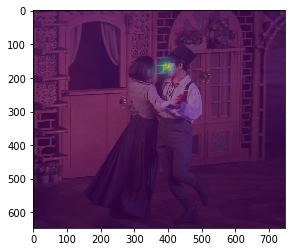

In [5]:
image1 = cv2.imread("C:\\softtermp\\S2.jpg")
# Fix the input Height and get the width according to the Aspect Ratio
imageHeight, imageWidth, _ = image1.shape
inHeight = 368
inWidth = int((inHeight/imageHeight)*imageWidth)

inpBlob = cv2.dnn.blobFromImage(image1, 1.0 / 255, (inWidth, inHeight),(0, 0, 0), swapRB=False, crop=False)
    
net.setInput(inpBlob)
output = net.forward()
   
i = 0
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (imageWidth, imageHeight))

plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
    

In [ ]:

def getKeypoints(probMap, threshold=0.1):

    mapSmooth = cv2.GaussianBlur(probMap,(3,3),0,0)

    mapMask = np.uint8(mapSmooth>threshold)
    keypoints = []

    #find the blobs
    contours, _ = cv2.findContours(mapMask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #for each blob find the maxima
    for cnt in contours:
        blobMask = np.zeros(mapMask.shape)
        blobMask = cv2.fillConvexPoly(blobMask, cnt, 1)
        maskedProbMap = mapSmooth * blobMask
        _, maxVal, _, maxLoc = cv2.minMaxLoc(maskedProbMap)
        keypoints.append(maxLoc + (probMap[maxLoc[1], maxLoc[0]],))

    return keypoints

In [ ]:
"""
# import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('gradient.jpg',0)

ret, thresh1 = cv2.threshold(img,127,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,127,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,127,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO_INV)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()
"""

In [1]:
# fashion_pose.py : MPII를 사용한 신체부위 검출
# 팔굽혀펴기 카운팅 프로그램.
import cv2
import numpy as np

# for Angle calculation
import math
# for Executed Time calculation
import time

import winsound as ws

def beepsound() :
    freq = 2000
    dur = 1000
    ws.Beep(freq, dur)

# 세점 사이 각도 구하기
def getAngle(a, b, c):
    Angle1 = c[0]-b[0]
    Angle2 = a[0]-b[0]

    if Angle1 == 0 :
        Angle1 = 1
    if Angle2 == 0 :
        Angle2 = 1

    ang = math.degrees(math.atan2(c[1]-b[1], Angle1) - math.atan2(a[1]-b[1], Angle2))
    if ang < 0 :
        ang = ang + 360
        if ang > 180 :
            ang = 180 - (ang%180)
            return int(ang)
        else :
            return int(ang)
    else :
        if ang > 180 :
            ang = 180 - (ang%180)
            return int(ang)
        else :
            return int(ang)


# MPII에서 각 파트 번호, 선으로 연결될 POSE_PAIRS
BODY_PARTS = { "Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
                "Background": 15 }

POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
                ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
                ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
                ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]
    
# 각 파일 path 
protoFile = "C:\\softtermp\\openpose-master\\openpose-master\\models\\pose\\mpi\\pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "C:\\softtermp\\openpose-master\\openpose-master\\models\\pose\\mpi\\pose_iter_160000.caffemodel"
 
# 위의 path에 있는 network 불러오기
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

#영상 가지고 오기 "C:\\Users\\user\\Desktop\\captstone\\final5.avi"


cap = cv2.VideoCapture(0) #동영상 캡쳐 생성
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print("너비는 {} 높이는 {}".format(width,height))

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480*0.8)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 320*0.8)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print("바뀐 너비는 {} 높이는 {}".format(width,height))

# For Counting
# 방법 : 
# 1) 팔 각도가 굽혀졌을 때 gyun = true
# 2) chang과 gyun 비교해서 다르면 howmany++, chang = gyun
# 3) 팔 각도가 다시 펴졌을때 gyun = false
# 4) 2)번 반복
# 결과적으로 howmany == 팔굽혀펴기 갯수 * 2
chang = False
gyun = False
howmany = 0

# Angle up,down / Height up,down
Aupside = 150
Adownside = 120
Hupside = 105
Hdownside = 97

if cap.isOpened() :
    file_path ="C:\\softtermp\\S1.mp4"
    fps = cap.get(cv2.CAP_PROP_FPS) #프레임수 구하기
    fourcc = cv2.VideoWriter_fourcc(*"DIVX")
    size = (int(width), int(height))
    out = cv2.VideoWriter(file_path, fourcc, 10, size)
    delay = int(1000/fps)
    
    # 실행 시간 계산
    start = time.time()

    while True:
        ret, image = cap.read()
        if ret :
            # frame.shape = 불러온 이미지에서 height, width, color 받아옴
            imageHeight = int(height)
            imageWidth  = int(width)
            
            # network에 넣기위해 전처리
            inpBlob = cv2.dnn.blobFromImage(image, 1.0 / 255, (imageWidth, imageHeight), (0, 0, 0), swapRB=False, crop=False)
            
            # network에 넣어주기
            net.setInput(inpBlob)

            # 결과 받아오기
            output = net.forward()

            # output.shape[0] = 이미지 ID, [1] = 출력 맵의 높이, [2] = 너비
            H = output.shape[2]
            W = output.shape[3]
            print("이미지 ID : ", output.shape[0], ", H : ", output.shape[2], ", W : ",output.shape[3]) # 이미지 ID

            # 키포인트 검출시 이미지에 그려줌
            points = []
            # Shoulder Balance / Forward Head Posture
            
            PartsXY = [[0]*2 for _ in range(8)]
            checkH = False
            checkN = False
            checkRs = False
            checkLs = False
            checkRe = False
            checkLe = False
            checkRw = False
            checkLw = False

            for i in range(0,15):
                # 해당 신체부위 신뢰도 얻음.
                probMap = output[0, i, :, :]
            
                # global 최대값 찾기
                minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

                # 원래 이미지에 맞게 점 위치 변경
                x = (imageWidth * point[0]) / W
                y = (imageHeight * point[1]) / H

                # 키포인트 검출한 결과가 0.1보다 크면(검출한곳이 위 BODY_PARTS랑 맞는 부위면) points에 추가, 검출했는데 부위가 없으면 None으로    
                if prob > 0.1 :    
                    cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)       # circle(그릴곳, 원의 중심, 반지름, 색)
                    # BODY_PARTS 별 x, y 좌표값
                    print("i : ", i , ", x : ", x, ", y : ",y)
                    cv2.putText(image, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
                    points.append((int(x), int(y)))
                    if i == 0 :
                        checkH = True
                        PartsXY[0][0] = x
                        PartsXY[0][1] = y
                    elif i == 1 :
                        checkN = True
                        PartsXY[1][0] = x
                        PartsXY[1][1] = y
                    elif i == 2 :
                        checkRs = True
                        PartsXY[2][0] = x
                        PartsXY[2][1] = y
                    elif i == 5 :
                        checkLs = True
                        PartsXY[3][0] = x
                        PartsXY[3][1] = y
                    elif i == 3 :
                        checkRe = True
                        PartsXY[4][0] = x
                        PartsXY[4][1] = y
                    elif i == 6 :
                        checkLe = True
                        PartsXY[5][0] = x
                        PartsXY[5][1] = y
                    elif i == 4 :
                        checkRw = True
                        PartsXY[6][0] = x
                        PartsXY[6][1] = y
                    elif i == 7 :
                        checkLw = True
                        PartsXY[7][0] = x
                        PartsXY[7][1] = y
                else :
                    points.append(None)
            # 양쪽 팔꿈치의 내각을 계산 (getAngle 함수 사용)
            # Elbow를 교점으로 하여 Shoulder와 Wrist 세 parts 사이의 각도를 계산한다.
            if checkLs and checkLe and checkLw and (PartsXY[3][0]-PartsXY[5][0]) != 0 and (PartsXY[7][0]-PartsXY[5][0]) :
                angleL = getAngle(PartsXY[3], PartsXY[5], PartsXY[7])
                cv2.putText(image, "AngleL : " + str(angleL), (10, 45), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1, lineType=cv2.LINE_AA)
            if checkRs and checkRe and checkRw and (PartsXY[2][0]-PartsXY[4][0]) != 0 and (PartsXY[6][0]-PartsXY[4][0]) :
                angleR = getAngle(PartsXY[2], PartsXY[4], PartsXY[6])
                cv2.putText(image, "AngleR : "+str(angleR), (10,60), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1, lineType=cv2.LINE_AA)
            
            cv2.putText(image, "fps : " + str(cv2.CAP_PROP_FPS), (10, 75), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1, lineType=cv2.LINE_AA)
            cv2.putText(image, "Executed Time : " + str(round(time.time()-start,2)), (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1, lineType=cv2.LINE_AA)
            cv2.putText(image, "Video Time : "+ str(round((time.time()-start) / cv2.CAP_PROP_FPS / cv2.CAP_PROP_FPS,2)), (10, 105), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1, lineType=cv2.LINE_AA)
            
            # 팔굽혀 펴기를 할때에 가슴높이를 계산
            # 가슴 높이를 계산할 때 바닥의 좌표를 계산하는데 어려움이 있음.
            # 대안으로 parts 중에서 바닥의 좌표값과 가장 가까운 wrist의 좌표값을 이용.
            # 양쪽 어깨와 손목까지의 거리 평균을 이용하여 CtoW(Chest to Wrist) 를 계산한다.
            if checkRs and checkRw and checkLs and checkLw :
                CtoW = round(((PartsXY[6][1]-PartsXY[2][1])+(PartsXY[7][1]-PartsXY[3][1]))/2,2)
                cv2.putText(image, "Shoulder to Wrist (Average L,R) : " + str(CtoW), (10, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1, lineType=cv2.LINE_AA)

            # For Counting
            # 양쪽 Shoulder, Elbow, Wrist part가 다 detect 될때에 연산을 한다.
            if checkRs and checkRe and checkRw :
                if checkLs and checkLe and checkLw :
                    angleR = getAngle(PartsXY[2], PartsXY[4], PartsXY[6])
                    angleL = getAngle(PartsXY[3], PartsXY[5], PartsXY[7])
                    CtoW = round(((PartsXY[6][1]-PartsXY[2][1])+(PartsXY[7][1]-PartsXY[3][1]))/2,2)
                    
                    # if : 팔이 펴졌을 때
                    # elif : 팔이 굽혀졌을 때
                    if(angleR > Aupside and angleL > Aupside and CtoW > Hupside) :
                        gyun = False
                    elif (angleR < Adownside and angleL < Adownside and CtoW < Hdownside) :
                        gyun = True

            # 굽힐때 +1, 필때 +1
            # 결과적으로 팔굽혀펴기 갯수 == howmany/2
            if chang != gyun :
                chang = gyun
                howmany = howmany + 1
                print(beepsound())

            # 팔굽혀 펴기 개수를 이미지에 대입.
            cv2.putText(image, "Counting : " + str(int(howmany/2)), (10, 165), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1, lineType=cv2.LINE_AA)
            cv2.putText(image, "Average (times/sec) : " + str(round((howmany/2)/((time.time()-start) / cv2.CAP_PROP_FPS / cv2.CAP_PROP_FPS),2)), (10, 180), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1, lineType=cv2.LINE_AA)
            cv2.putText(image, "howmany (count*2) (times/sec) : " + str(int(howmany)), (10, 195), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1, lineType=cv2.LINE_AA)
            cv2.putText(image, "Chang : " + str(chang), (10, 210), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1, lineType=cv2.LINE_AA)
            cv2.putText(image, "gyun : " + str(gyun), (10, 225), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1, lineType=cv2.LINE_AA)

            # 이미지 복사
            imageCopy = image

            # 각 POSE_PAIRS별로 선 그어줌 (머리 - 목, 목 - 왼쪽어깨, ...)
            for pair in POSE_PAIRS:
                partA = pair[0]             # Head
                partA = BODY_PARTS[partA]   # 0
                partB = pair[1]             # Neck
                partB = BODY_PARTS[partB]   # 1
                
                #print(partA," 와 ", partB, " 연결\n")
                if points[partA] and points[partB] and partA == 0:
                    cv2.line(imageCopy, points[partA], points[partB], (0, 255, 0), 2)
                elif points[partA] and points[partB] and partA == 1:
                    cv2.line(imageCopy, points[partA], points[partB], (255, 0, 0), 2)
                elif points[partA] and points[partB] and partA == 2:
                    cv2.line(imageCopy, points[partA], points[partB], (0, 0, 255), 2)
                elif points[partA] and points[partB] and partA == 3:
                    cv2.line(imageCopy, points[partA], points[partB], (250, 128, 114), 2)
                elif points[partA] and points[partB] and partA == 4:
                    cv2.line(imageCopy, points[partA], points[partB], (255, 20, 147), 2)
                elif points[partA] and points[partB] and partA == 5:
                    cv2.line(imageCopy, points[partA], points[partB], (0, 255, 255), 2)
                elif points[partA] and points[partB] and partA == 6:
                    cv2.line(imageCopy, points[partA], points[partB], (255, 140, 0), 2)
                elif points[partA] and points[partB] and partA == 7:
                    cv2.line(imageCopy, points[partA], points[partB], (72, 209, 24), 2)
                elif points[partA] and points[partB] and partA == 8:
                    cv2.line(imageCopy, points[partA], points[partB], (189, 183, 107), 2)
                elif points[partA] and points[partB] and partA == 9:
                    cv2.line(imageCopy, points[partA], points[partB], (138, 43, 226), 2)
                elif points[partA] and points[partB] and partA == 10:
                    cv2.line(imageCopy, points[partA], points[partB], (106, 30, 205), 2)
                elif points[partA] and points[partB] and partA == 11:
                    cv2.line(imageCopy, points[partA], points[partB], (85, 107, 47), 2)
                elif points[partA] and points[partB] and partA == 12:
                    cv2.line(imageCopy, points[partA], points[partB], (186, 85, 211), 2)
                elif points[partA] and points[partB] and partA == 13:
                    cv2.line(imageCopy, points[partA], points[partB], (128, 128, 128), 2)
                elif points[partA] and points[partB] and partA == 14:
                    cv2.line(imageCopy, points[partA], points[partB], (32, 128, 248), 2)

            cv2.imshow("Output-Keypoints",imageCopy)
            out.write(imageCopy)

            if cv2.waitKey(1) != -1 :
                break

        else :
            print("no frame")
            break
    out.release()

else:
    print("열지 못했다")

cap.release()
cv2.destroyAllWindows()



너비는 640.0 높이는 480.0
바뀐 너비는 352.0 높이는 288.0
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  44
이미지 ID :  1 , H :  36 , W :  

KeyboardInterrupt: 